# OpenSeeD embedding test
This notebook demonstrates how to obtain text and pixel embeddings using the utilities in the `tools` package.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [2]:
import os, sys
# this cell is required to make the next relative import statement possible
NB_DIR = os.getcwd() # /home/jovyan/teaching_material/msc/MSc-Thesis
OPENSEED_ROOT = os.path.abspath(os.path.join(NB_DIR, '..', 'OpenSeeD'))

TOOLS_DIR = os.path.join(OPENSEED_ROOT, 'tools')
for p in (TOOLS_DIR, OPENSEED_ROOT):
    if p not in sys.path:
        sys.path.insert(0, p)

In [3]:
from openseed_dump_text import openseed_text
from openseed_dump_pixels import load_model, pixel_features

/home/jovyan/teaching_material/msc/envs/vlmaps6/lib/python3.8/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [4]:
emb = openseed_text(['example object'])
print('text embedding shape:', emb.shape)

text embedding shape: (1, 512)


In [5]:
img_path = '/home/jovyan/teaching_material/msc/MSc-Thesis/data/5LpN3gDmAk7_1/rgb/5LpN3gDmAk7_370.png'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = load_model('configs/openseed/openseed_swinl_lang_decouple.yaml', 'weights/openseed_swinl_pano_sota.pt', device)
feats = pixel_features(model, img_path)
print('pixel features shape:', feats.shape)  # should be (512,H,W)

/home/jovyan/teaching_material/msc/envs/vlmaps6/lib/python3.8/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


self.task_switch  {'coco': True, 'o365': True}


*UNLOADED* criterion_coco.empty_weight, Model Shape: torch.Size([134])
*UNLOADED* criterion_o365.empty_weight, Model Shape: torch.Size([366])
$UNUSED$ criterion.empty_weight, Ckpt Shape: torch.Size([134])


pixel features shape: (512, 720, 1080)


In [6]:
def visualize_segmentation(img_path, feats, label_emb):
    img = np.array(Image.open(img_path).convert('RGB'))
    scores = (feats * label_emb[:, None, None]).sum(0)
    mask = (scores > scores.mean()).astype(float)
    overlay = img.copy().astype(float)
    overlay[mask > 0] *= 0.5
    overlay[mask > 0] += np.array([255,0,0]) * 0.5
    plt.imshow(overlay.astype('uint8'))
    plt.axis('off')
    plt.show()

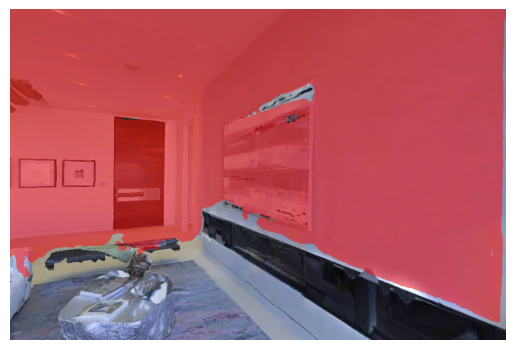

In [7]:
visualize_segmentation(img_path, feats, emb[0])